# 2019新型冠状病毒（COVID-19/2019-nCoV）疫情分析
   
>**祈LHL**


![](images/banner.jpg)

## <font color='red'>重要说明</font>


分析文档：完成度：代码质量 3:5:2

其中分析文档是指你数据分析的过程中，对各问题分析的思路、对结果的解释、说明(要求言简意赅，不要为写而写)

ps:<font color='red'>你自己写的代码胜过一切的代笔，无关美丑，只问今日比昨日更长进！加油！</font>

由于数据过多，查看数据尽量使用head()或tail()，以免程序长时间无响应

=======================

本项目数据来源于丁香园。本项目主要目的是**通过对疫情历史数据的分析研究，以更好的了解疫情与疫情的发展态势，为抗击疫情之决策提供数据支持。**

## 一. 提出问题

从全国范围，你所在省市，国外疫情等三个方面主要研究以下几个问题：

（一）全国累计确诊/疑似/治愈/死亡情况随时间变化趋势如何？

（二）全国新增确诊/疑似/治愈/死亡情况随时间变化趋势如何？

（三）全国新增境外输入随时间变化趋势如何？

（四）你所在的省市情况如何？

（五）国外疫情态势如何？

（六）结合你的分析结果，对个人和社会在抗击疫情方面有何建议？


## 二. 理解数据

原始数据集：AreaInfo.csv，导入相关包及读取数据：

In [3]:
r_hex = '#dc2624'     # red,       RGB = 220,38,36
dt_hex = '#2b4750'    # dark teal, RGB = 43,71,80
tl_hex = '#45a0a2'    # teal,      RGB = 69,160,162
r1_hex = '#e87a59'    # red,       RGB = 232,122,89
tl1_hex = '#7dcaa9'   # teal,      RGB = 125,202,169
g_hex = '#649E7D'     # green,     RGB = 100,158,125
o_hex = '#dc8018'     # orange,    RGB = 220,128,24
tn_hex = '#C89F91'    # tan,       RGB = 200,159,145
g50_hex = '#6c6d6c'   # grey-50,   RGB = 108,109,108
bg_hex = '#4f6268'    # blue grey, RGB = 79,98,104
g25_hex = '#c7cccf'   # grey-25,   RGB = 199,204,207

In [4]:
import numpy as np
import pandas as pd
import matplotlib,re
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator


data = pd.read_csv(r'data/AreaInfo.csv')

**查看与统计数据，以对数据有一个大致了解**

In [5]:
data.head()

,continentName,continentEnglishName,countryName,countryEnglishName,provinceName,provinceEnglishName,province_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,updateTime,cityName,cityEnglishName,city_zipCode,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount
0,北美洲,North America,美国,United States of America,美国,United States of America,971002,2306247,0.0,640198,120351,2020-06-23 10:01:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,南美洲,South America,巴西,Brazil,巴西,Brazil,973003,1106470,0.0,549386,51271,2020-06-23 10:01:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,欧洲,Europe,英国,United Kingdom,英国,United Kingdom,961007,305289,0.0,539,42647,2020-06-23 10:01:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,欧洲,Europe,俄罗斯,Russia,俄罗斯,Russia,964006,592280,0.0,344416,8206,2020-06-23 10:01:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,南美洲,South America,智利,Chile,智利,Chile,973004,246963,0.0,44946,4502,2020-06-23 10:01:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 三. 数据清洗

### （一）基本数据处理

数据清洗主要包括：**选取子集，缺失数据处理、数据格式转换、异常值数据处理**等。

#### 国内疫情数据选取（最终选取的数据命名为china）

1. 选取国内疫情数据

2. 对于更新时间(updateTime)列，需将其转换为日期类型并提取出年-月-日，并查看处理结果。(提示：dt.date)

3. 因数据每天按小时更新，一天之内有很多重复数据，请去重并只保留一天之内最新的数据。

> 提示：df.drop_duplicates(subset=['provinceName', 'updateTime'], keep='first', inplace=False)

> 其中df是你选择的国内疫情数据的DataFrame

分析：选取countryName一列中值为中国的行组成CHINA。

In [6]:
CHINA = data.loc[data['countryName'] == '中国']
CHINA.dropna(subset=['cityName'], how='any', inplace=True)
#CHINA

D:\Anaconda\envs\python32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


分析：取出含所有中国城市的列表

In [7]:
cities = list(set(CHINA['cityName']))

分析：遍历取出每一个城市的子dataframe，然后用sort对updateTime进行时间排序

In [8]:
for city in cities:
    CHINA.loc[data['cityName'] == city].sort_values(by = 'updateTime')

分析：去除空值所在行

In [9]:
CHINA.dropna(subset=['cityName'],inplace=True)
#CHINA.loc[CHINA['cityName'] == '秦皇岛'].tail(20)

D:\Anaconda\envs\python32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


 分析：将CHINA中的updateTime列进行格式化处理

In [10]:
CHINA.updateTime = pd.to_datetime(CHINA.updateTime,format="%Y-%m-%d",errors='coerce').dt.date
#CHINA.loc[data['cityName'] == '秦皇岛'].tail(15)

D:\Anaconda\envs\python32\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [11]:
CHINA.head()

,continentName,continentEnglishName,countryName,countryEnglishName,provinceName,provinceEnglishName,province_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,updateTime,cityName,cityEnglishName,city_zipCode,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount
136,亚洲,Asia,中国,China,陕西省,Shaanxi,610000,317,1.0,307,3,2020-06-23,境外输入,NaN,0.0,72.0,0.0,65.0,0.0
137,亚洲,Asia,中国,China,陕西省,Shaanxi,610000,317,1.0,307,3,2020-06-23,西安,Xi'an,610100.0,120.0,0.0,117.0,3.0
138,亚洲,Asia,中国,China,陕西省,Shaanxi,610000,317,1.0,307,3,2020-06-23,安康,Ankang,610900.0,26.0,0.0,26.0,0.0
139,亚洲,Asia,中国,China,陕西省,Shaanxi,610000,317,1.0,307,3,2020-06-23,汉中,Hanzhong,610700.0,26.0,0.0,26.0,0.0
140,亚洲,Asia,中国,China,陕西省,Shaanxi,610000,317,1.0,307,3,2020-06-23,咸阳,Xianyang,610400.0,17.0,0.0,17.0,0.0


分析：每日数据的去重只保留第一个数据，因为前面已经对时间进行排序，第一个数据即为当天最新数据   
分析：考虑到合并dataframe需要用到concat，需要创建一个初始china

In [12]:
real = CHINA.loc[data['cityName'] == cities[1]]
real.drop_duplicates(subset='updateTime', keep='first', inplace=True)
china = real

D:\Anaconda\envs\python32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


分析：遍历每个城市dataframe进行每日数据的去重，否则会出现相同日期只保留一个城市的数据的情况

In [13]:
for city in cities[2:]:
    real_data = CHINA.loc[data['cityName'] == city]
    real_data.drop_duplicates(subset='updateTime', keep='first', inplace=True)
    china = pd.concat([real_data, china],sort=False)

D:\Anaconda\envs\python32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


查看数据信息，是否有缺失数据/数据类型是否正确。

提示：若不会处理缺失值，可以将其舍弃

分析：有的城市不是每日都上报的，如果某日只统计上报的那些城市，那些存在患者却不上报的城市就会被忽略，数据就失真了，需要补全所有城市每日的数据，即便不上报的城市也要每日记录数据统计，所以要进行插值处理补全部分数据，处理方法详见```数据透视与分析```

In [14]:
china.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32812 entries, 96106 to 208267
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   continentName            32812 non-null  object 
 1   continentEnglishName     32812 non-null  object 
 2   countryName              32812 non-null  object 
 3   countryEnglishName       32812 non-null  object 
 4   provinceName             32812 non-null  object 
 5   provinceEnglishName      32812 non-null  object 
 6   province_zipCode         32812 non-null  int64  
 7   province_confirmedCount  32812 non-null  int64  
 8   province_suspectedCount  32812 non-null  float64
 9   province_curedCount      32812 non-null  int64  
 10  province_deadCount       32812 non-null  int64  
 11  updateTime               32812 non-null  object 
 12  cityName                 32812 non-null  object 
 13  cityEnglishName          31968 non-null  object 
 14  city_zipCode     

In [15]:
china.head()

,continentName,continentEnglishName,countryName,countryEnglishName,provinceName,provinceEnglishName,province_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,updateTime,cityName,cityEnglishName,city_zipCode,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount
96106,亚洲,Asia,中国,China,广西壮族自治区,Guangxi,450000,254,0.0,252,2,2020-04-02,贵港,Guigang,450800.0,8.0,0.0,8.0,0.0
125120,亚洲,Asia,中国,China,广西壮族自治区,Guangxi,450000,254,0.0,250,2,2020-03-20,贵港,Guigang,450800.0,8.0,0.0,8.0,0.0
128762,亚洲,Asia,中国,China,广西壮族自治区,Guangxi,450000,253,0.0,250,2,2020-03-18,贵港,Guigang,450800.0,8.0,0.0,8.0,0.0
130607,亚洲,Asia,中国,China,广西壮族自治区,Guangxi,450000,253,0.0,248,2,2020-03-17,贵港,Guigang,450800.0,8.0,0.0,8.0,0.0
131428,亚洲,Asia,中国,China,广西壮族自治区,Guangxi,450000,252,0.0,248,2,2020-03-16,贵港,Guigang,450800.0,8.0,0.0,8.0,0.0


#### 你所在省市疫情数据选取（最终选取的数据命名为myhome）

此步也可在后面用到的再做

In [16]:
myhome = china.loc[data['provinceName'] == '广东省']
myhome.head()

,continentName,continentEnglishName,countryName,countryEnglishName,provinceName,provinceEnglishName,province_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,updateTime,cityName,cityEnglishName,city_zipCode,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount
205259,亚洲,Asia,中国,China,广东省,Guangdong,440000,277,0.0,5,0,2020-01-29,外地来粤人员,NaN,NaN,5.0,0.0,0.0,0.0
206335,亚洲,Asia,中国,China,广东省,Guangdong,440000,207,0.0,4,0,2020-01-28,河源市,NaN,NaN,1.0,0.0,0.0,0.0
205239,亚洲,Asia,中国,China,广东省,Guangdong,440000,277,0.0,5,0,2020-01-29,外地来穗人员,NaN,NaN,5.0,0.0,0.0,0.0
252,亚洲,Asia,中国,China,广东省,Guangdong,440000,1634,11.0,1619,8,2020-06-23,潮州,Chaozhou,445100.0,6.0,0.0,6.0,0.0
2655,亚洲,Asia,中国,China,广东省,Guangdong,440000,1634,11.0,1614,8,2020-06-21,潮州,Chaozhou,445100.0,6.0,0.0,6.0,0.0


#### 国外疫情数据选取（最终选取的数据命名为world）

此步也可在后面用到的再做

In [17]:
world = data.loc[data['countryName'] != '中国']
world.head()

,continentName,continentEnglishName,countryName,countryEnglishName,provinceName,provinceEnglishName,province_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,updateTime,cityName,cityEnglishName,city_zipCode,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount
0,北美洲,North America,美国,United States of America,美国,United States of America,971002,2306247,0.0,640198,120351,2020-06-23 10:01:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,南美洲,South America,巴西,Brazil,巴西,Brazil,973003,1106470,0.0,549386,51271,2020-06-23 10:01:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,欧洲,Europe,英国,United Kingdom,英国,United Kingdom,961007,305289,0.0,539,42647,2020-06-23 10:01:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,欧洲,Europe,俄罗斯,Russia,俄罗斯,Russia,964006,592280,0.0,344416,8206,2020-06-23 10:01:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,南美洲,South America,智利,Chile,智利,Chile,973004,246963,0.0,44946,4502,2020-06-23 10:01:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**数据透视与分析**

分析：对china进行插值处理补全部分数据

In [18]:
china.head()

,continentName,continentEnglishName,countryName,countryEnglishName,provinceName,provinceEnglishName,province_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,updateTime,cityName,cityEnglishName,city_zipCode,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount
96106,亚洲,Asia,中国,China,广西壮族自治区,Guangxi,450000,254,0.0,252,2,2020-04-02,贵港,Guigang,450800.0,8.0,0.0,8.0,0.0
125120,亚洲,Asia,中国,China,广西壮族自治区,Guangxi,450000,254,0.0,250,2,2020-03-20,贵港,Guigang,450800.0,8.0,0.0,8.0,0.0
128762,亚洲,Asia,中国,China,广西壮族自治区,Guangxi,450000,253,0.0,250,2,2020-03-18,贵港,Guigang,450800.0,8.0,0.0,8.0,0.0
130607,亚洲,Asia,中国,China,广西壮族自治区,Guangxi,450000,253,0.0,248,2,2020-03-17,贵港,Guigang,450800.0,8.0,0.0,8.0,0.0
131428,亚洲,Asia,中国,China,广西壮族自治区,Guangxi,450000,252,0.0,248,2,2020-03-16,贵港,Guigang,450800.0,8.0,0.0,8.0,0.0


分析：先创建省份列表和日期列表，并初始化一个draft

In [19]:
province = list(set(china['provinceName']))#每个省份
#p_city = list(set(china[china['provinceName'] == province[0]]['cityName']))#每个省份的城市
date_0 = []
for dt in china.loc[china['provinceName'] ==  province[0]]['updateTime']:
    date_0.append(str(dt))
date_0 = list(set(date_0))
date_0.sort()
start = china.loc[china['provinceName'] ==  province[0]]['updateTime'].min()
end = china.loc[china['provinceName'] ==  province[0]]['updateTime'].max()
dates = pd.date_range(start=str(start), end=str(end))
aid_frame = pd.DataFrame({'updateTime': dates,'provinceName':[province[0]]*len(dates)})
aid_frame.updateTime = pd.to_datetime(aid_frame.updateTime,format="%Y-%m-%d",errors='coerce').dt.date
#draft = pd.merge(china.loc[china['provinceName'] ==  province[1]], aid_frame, on='updateTime', how='outer').sort_values('updateTime')
draft = pd.concat([china.loc[china['provinceName'] ==  province[0]], aid_frame], join='outer').sort_values('updateTime')
draft.province_confirmedCount.fillna(method="ffill",inplace=True)
draft.province_suspectedCount.fillna(method="ffill", inplace=True)
draft.province_curedCount.fillna(method="ffill", inplace=True)
draft.province_deadCount.fillna(method="ffill", inplace=True)

分析：补全部分时间，取前日的数据进行插值，因为有的省份从4月末开始陆续就不再有新增病患，不再上报，所以这些省份的数据只能补全到4月末，往后的数据逐渐失去真实性

分析：同时进行日期格式化

In [20]:
for p in range(1,len(province)):
    date_d = []
    for dt in china.loc[china['provinceName'] ==  province[p]]['updateTime']:
        date_d.append(dt)
    date_d = list(set(date_d))
    date_d.sort()
    start = china.loc[china['provinceName'] ==  province[p]]['updateTime'].min()
    end = china.loc[china['provinceName'] ==  province[p]]['updateTime'].max()
    dates = pd.date_range(start=start, end=end)
    aid_frame = pd.DataFrame({'updateTime': dates,'provinceName':[province[p]]*len(dates)})
    aid_frame.updateTime = pd.to_datetime(aid_frame.updateTime,format="%Y-%m-%d",errors='coerce').dt.date
    X = china.loc[china['provinceName'] ==  province[p]]
    X.reset_index(drop= True)
    Y = aid_frame
    Y.reset_index(drop= True)
    draft_d = pd.concat([X,Y], join='outer').sort_values('updateTime')
    draft = pd.concat([draft,draft_d])
    draft.province_confirmedCount.fillna(method="ffill",inplace=True)
    draft.province_suspectedCount.fillna(method="ffill", inplace=True)
    draft.province_curedCount.fillna(method="ffill", inplace=True)
    draft.province_deadCount.fillna(method="ffill", inplace=True)
    #draft['updateTime'] = draft['updateTime'].strftime('%Y-%m-%d')
    #draft['updateTime'] = pd.to_datetime(draft['updateTime'],format="%Y-%m-%d",errors='coerce').dt.date

In [21]:
china = draft

In [22]:
china.head()

,continentName,continentEnglishName,countryName,countryEnglishName,provinceName,provinceEnglishName,province_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,updateTime,cityName,cityEnglishName,city_zipCode,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount
208226,亚洲,Asia,中国,China,天津市,Tianjin,120000.0,14.0,0.0,0.0,0.0,2020-01-26,外地来津,NaN,NaN,2.0,0.0,0.0,0.0
208224,亚洲,Asia,中国,China,天津市,Tianjin,120000.0,14.0,0.0,0.0,0.0,2020-01-26,河北区,Hebei District,120105.0,5.0,0.0,0.0,0.0
208228,亚洲,Asia,中国,China,天津市,Tianjin,120000.0,14.0,0.0,0.0,0.0,2020-01-26,和平区,Heping District,120101.0,1.0,0.0,0.0,0.0
208227,亚洲,Asia,中国,China,天津市,Tianjin,120000.0,14.0,0.0,0.0,0.0,2020-01-26,滨海新区,Binhai New Area,120116.0,1.0,0.0,0.0,0.0
208230,亚洲,Asia,中国,China,天津市,Tianjin,120000.0,14.0,0.0,0.0,0.0,2020-01-26,西青区,Xiqing District,120111.0,1.0,0.0,0.0,0.0


## 四. 数据分析及可视化

在进行数据分析及可视化时，依据每个问题选取所需变量并新建DataFrame再进行分析和可视化展示，这样数据不易乱且条理更清晰。

### 基础分析

基础分析，**只允许使用numpy、pandas和matplotlib库**。

可以在一张图上多个坐标系展示也可以在多张图上展示

请根据分析目的选择图形的类型(折线图、饼图、直方图和散点图等等)，实在没有主意可以到百度疫情地图或其他疫情分析的站点激发激发灵感。

#### （一）全国累计确诊/疑似/治愈/死亡情况随时间变化趋势如何？

分析：要获得全国累计情况随时间变化趋势，首先需要整合每日全国累计确诊情况做成date_confirmed

分析：要整合每日全国累计确诊情况，首先得提取每个省份每日当天最新累计确诊人数，省份数据求和后形成dataframe，  
for循环拼接到date_confirmed中

In [23]:
date = list(set(china['updateTime']))
date.sort()
date

[datetime.date(2020, 1, 24),
 datetime.date(2020, 1, 25),
 datetime.date(2020, 1, 26),
 datetime.date(2020, 1, 27),
 datetime.date(2020, 1, 28),
 datetime.date(2020, 1, 29),
 datetime.date(2020, 1, 30),
 datetime.date(2020, 1, 31),
 datetime.date(2020, 2, 1),
 datetime.date(2020, 2, 2),
 datetime.date(2020, 2, 3),
 datetime.date(2020, 2, 4),
 datetime.date(2020, 2, 5),
 datetime.date(2020, 2, 6),
 datetime.date(2020, 2, 7),
 datetime.date(2020, 2, 8),
 datetime.date(2020, 2, 9),
 datetime.date(2020, 2, 10),
 datetime.date(2020, 2, 11),
 datetime.date(2020, 2, 12),
 datetime.date(2020, 2, 13),
 datetime.date(2020, 2, 14),
 datetime.date(2020, 2, 15),
 datetime.date(2020, 2, 16),
 datetime.date(2020, 2, 17),
 datetime.date(2020, 2, 18),
 datetime.date(2020, 2, 19),
 datetime.date(2020, 2, 20),
 datetime.date(2020, 2, 21),
 datetime.date(2020, 2, 22),
 datetime.date(2020, 2, 23),
 datetime.date(2020, 2, 24),
 datetime.date(2020, 2, 25),
 datetime.date(2020, 2, 26),
 datetime.date(2020, 2,

In [24]:
china = china.set_index('provinceName')
china = china.reset_index()

分析：循环遍历省份和日期获得每个省份每日累计确诊，因为需要拼接，先初始化一个date_confirmed

In [25]:
list_p = []
list_d = []
list_e = []
for p in range(0,32):
    try:
        con_0 = china.loc[china['updateTime'] == date[2]].loc[china['provinceName'] ==  province[p]].iloc[[0]].iloc[0] 
        list_p.append(con_0['province_confirmedCount'])#该日每省的累计确诊人数
    except:
        continue
list_d.append(sum(list_p))
list_e.append(str(date[0]))
date_confirmed = pd.DataFrame(list_d,index=list_e)
date_confirmed.index.name="date"
date_confirmed.columns=["China_confirmedCount"]
date_confirmed

,China_confirmedCount
date,
2020-01-24,1956.0


分析：遍历每个省份拼接每日的总确诊人数的dataframe

In [26]:
l = 0
for i in date[3:]:
    list_p = []
    list_d = []
    list_e = []
    l +=1
    for p in range(0,32):
        try:
            con_0 = china.loc[china['updateTime'] == date[l]].loc[china['provinceName'] ==  province[p]].iloc[[0]].iloc[0] 
            list_p.append(con_0['province_confirmedCount'])#该日每省的累计确诊人数
        except:
            continue
    #con_0 = china.loc[china['updateTime'] == date[0]].loc[china['provinceName'] == '河北省'].loc[[0]].iloc[0]
    #list_p.append(con_0['province_confirmedCount'])#该日每省的累计确诊人数
    list_d.append(sum(list_p))
    list_e.append(str(date[l]))
    confirmed = pd.DataFrame(list_d, index=list_e)
    confirmed.index.name="date"
    confirmed.columns=["China_confirmedCount"]
    date_confirmed = pd.concat([date_confirmed,confirmed],sort=False)
date_confirmed

,China_confirmedCount
date,
2020-01-24,1956.0
2020-01-25,2253.0
2020-01-26,1956.0
2020-01-27,2825.0
2020-01-28,4589.0
...,...
2020-06-17,8106.0
2020-06-18,6862.0
2020-06-19,6894.0


分析：去除空值和不全的值

In [27]:
date_confirmed.dropna(subset=['China_confirmedCount'],inplace=True)
date_confirmed.tail(20)

,China_confirmedCount
date,
2020-06-02,78782.0
2020-06-03,78780.0
2020-06-04,76903.0
2020-06-05,76908.0
2020-06-06,8777.0
2020-06-07,8782.0
2020-06-08,8628.0
2020-06-09,8634.0
2020-06-10,8638.0


分析：数据从4月末开始到5月末就因为缺失过多省份的数据(部分省份从4月末至今再也没有新增病患)而失真，自2020-06-06起完全失去真实性，所以我删除了2020-06-06往后的数据

In [28]:
date_confirmed = date_confirmed.drop(['2020-06-06','2020-06-07','2020-06-08','2020-06-09','2020-06-10','2020-06-11','2020-06-12','2020-06-13','2020-06-14',
                     '2020-06-15','2020-06-16','2020-06-19','2020-06-18','2020-06-20','2020-06-17','2020-06-21'])

分析：构造拼接函数

In [29]:
def data_frame(self,china,element):
    l = 0
    for i in date[3:]:
        list_p = []
        list_d = []
        list_e = []
        l +=1
        for p in range(0,32):
            try:
                con_0 = china.loc[china['updateTime'] == date[l]].loc[china['provinceName'] ==  province[p]].iloc[[0]].iloc[0] 
                list_p.append(con_0[element])
            except:
                continue
        #con_0 = china.loc[china['updateTime'] == date[0]].loc[china['provinceName'] == '河北省'].loc[[0]].iloc[0]
        #list_p.append(con_0['province_confirmedCount'])
        list_d.append(sum(list_p))
        list_e.append(str(date[l]))
        link = pd.DataFrame(list_d, index=list_e)
        link.index.name="date"
        link.columns=["China"]
        self = pd.concat([self,link],sort=False)
    self.dropna(subset=['China'],inplace=True)
    self = self.drop(['2020-06-06','2020-06-07','2020-06-08','2020-06-09','2020-06-10','2020-06-11','2020-06-12','2020-06-13','2020-06-14',
                  '2020-06-15','2020-06-16','2020-06-19','2020-06-18','2020-06-20','2020-06-17','2020-06-21'])
    return self

分析：初始化各个变量

In [30]:
#累计治愈人数  date_curedCount
list_p = []
list_d = []
list_e = []
for p in range(0,32):
    try:
        con_0 = china.loc[china['updateTime'] == date[2]].loc[china['provinceName'] ==  province[p]].iloc[[0]].iloc[0] 
        list_p.append(con_0['province_curedCount'])
    except:
        continue
list_d.append(sum(list_p))
list_e.append(str(date[0]))
date_cured = pd.DataFrame(list_d, index=list_e)
date_cured.index.name="date"
date_cured.columns=["China"]



#累计死亡人数  date_dead
list_p = []
list_d = []
list_e = []
for p in range(0,32):
    try:
        con_0 = china.loc[china['updateTime'] == date[2]].loc[china['provinceName'] ==  province[p]].iloc[[0]].iloc[0] 
        list_p.append(con_0['province_deadCount'])
    except:
        continue
list_d.append(sum(list_p))
list_e.append(str(date[0]))
date_dead = pd.DataFrame(list_d, index=list_e)
date_dead.index.name="date"
date_dead.columns=["China"]

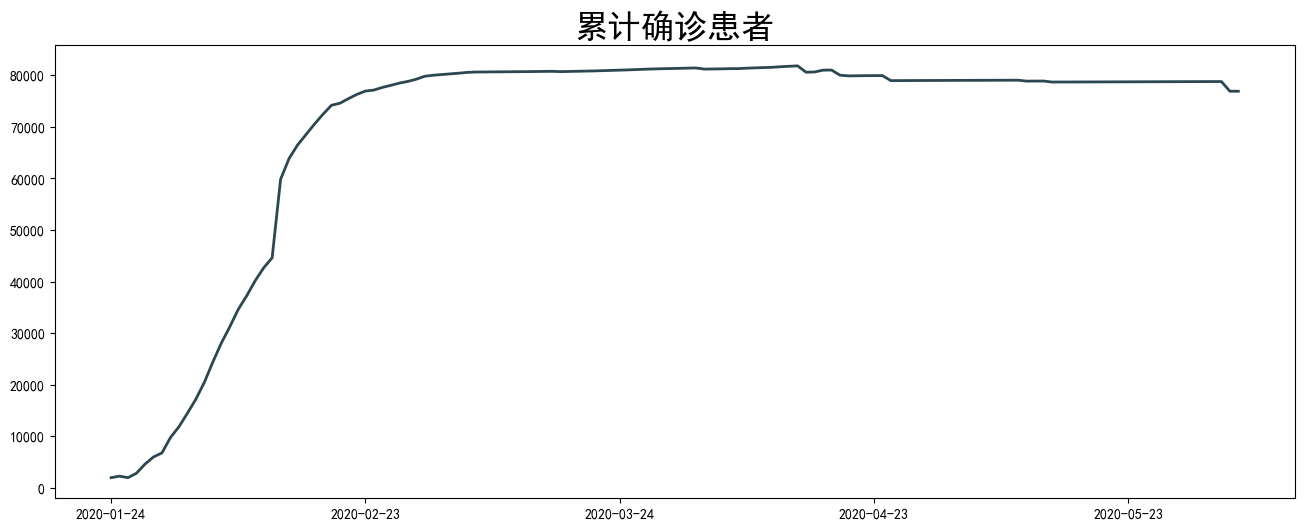

In [31]:
#累计确诊患者  date_confirmed
plt.rcParams['font.sans-serif'] = ['SimHei'] #更改字体,否则无法显示汉字
fig = plt.figure( figsize=(16,6), dpi=100)
ax = fig.add_subplot(1,1,1)
x = date_confirmed.index
y = date_confirmed.values
ax.plot( x, y, color=dt_hex, linewidth=2, linestyle='-' )
ax.set_title('累计确诊患者',fontdict={
      'color':'black',
      'size':24
})
ax.set_xticks( range(0,len(x),30))

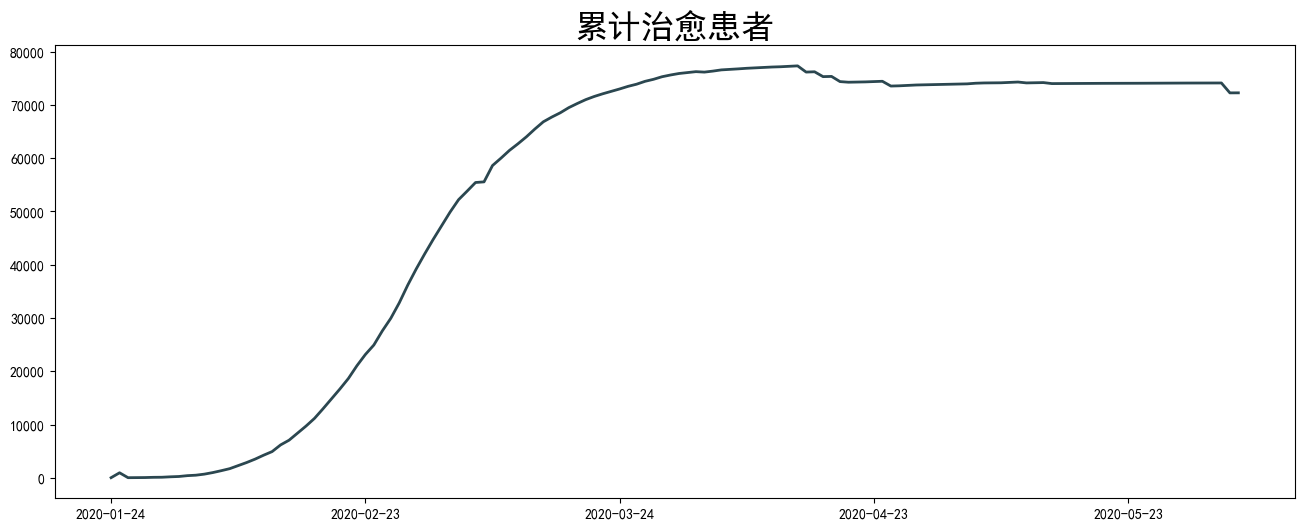

In [32]:
#累计治愈患者 date_curedCount
date_cured = data_frame(date_cured,china,'province_curedCount')
fig = plt.figure( figsize=(16,6), dpi=100)
ax = fig.add_subplot(1,1,1)
x = date_cured.index
y = date_cured.values
ax.set_title('累计治愈患者',fontdict={
      'color':'black',
      'size':24
})
ax.plot( x, y, color=dt_hex, linewidth=2, linestyle='-' )
ax.set_xticks( range(0,len(x),30))

分析：累计疑似无法通过补全数据得到

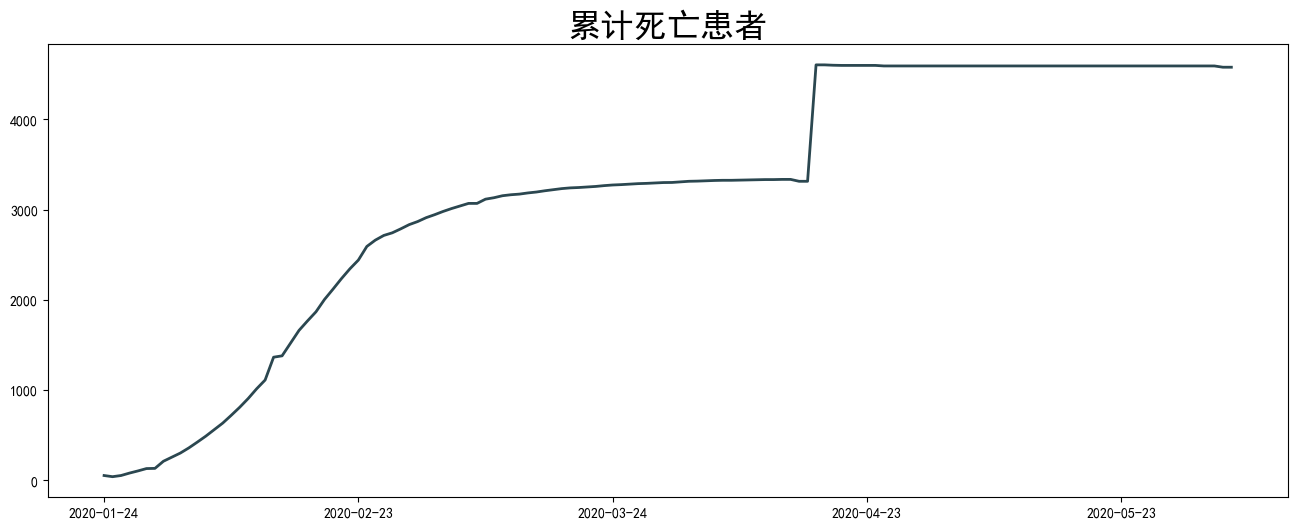

In [33]:
#累计死亡患者 date_dead
date_dead = data_frame(date_dead,china,'province_deadCount')
fig = plt.figure( figsize=(16,6), dpi=100)
ax = fig.add_subplot(1,1,1)
x = date_dead.index
y = date_dead.values
ax.plot( x, y, color=dt_hex, linewidth=2, linestyle='-' )
x_major_locator=MultipleLocator(12)
ax=plt.gca()
ax.set_title('累计死亡患者',fontdict={
      'color':'black',
      'size':24
})
ax.xaxis.set_major_locator(x_major_locator)
ax.set_xticks( range(0,len(x),30))

分析：疫情自1月初开始爆发，到2月末开始减缓增速，到4月末趋于平缓。治愈人数自2月初开始大幅增加，到3月末趋于平缓，死亡人数自1月末开始增加，到2月末趋于平缓，到4月末因为统计因素死亡人数飙升后趋于平缓。      
分析总结：确诊人数数据和治愈数据从4月末开始到5月末就因为缺失过多省份的数据(部分省份至今再也没有新增病患)导致失真，其他数据尽量通过补全,越靠近尾部数据越失真。死亡数据补全较为成功，几乎没有错漏。

#### （二）全国新增确诊/疑似/治愈/死亡情况随时间变化趋势如何？

分析：新增确诊/治愈/死亡的数据需要对china进行运算，每省每日进行diff差值运算

分析：首先初始化各个数据，然后仿照上面的拼接函数，作适用于该题的拼接函数

In [34]:
#新增确诊人数  date_new_confirmed
list_p = []
list_d = []
list_e = []
for p in range(0,32):
    try:
        con_0 = china.loc[china['updateTime'] == date[2]].loc[china['provinceName'] ==  province[p]].iloc[[0]].iloc[0] 
        list_p.append(con_0['province_confirmedCount'])#该日每省的累计确诊人数
    except:
        continue
list_d.append(sum(list_p))
list_e.append(str(date[0]))
date_new_confirmed = pd.DataFrame(list_d,index=list_e)
date_new_confirmed.index.name="date"
date_new_confirmed.columns=["China"]
date_new_confirmed


#新增治愈人数  date_new_curedCount
list_p = []
list_d = []
list_e = []
for p in range(0,32):
    try:
        con_0 = china.loc[china['updateTime'] == date[2]].loc[china['provinceName'] ==  province[p]].iloc[[0]].iloc[0] 
        list_p.append(con_0['province_curedCount'])
    except:
        continue
list_d.append(sum(list_p))
list_e.append(str(date[0]))
date_new_cured = pd.DataFrame(list_d, index=list_e)
date_new_cured.index.name="date"
date_new_cured.columns=["China"]


#新增死亡人数  date_new_dead
list_p = []
list_d = []
list_e = []
for p in range(0,32):
    try:
        con_0 = china.loc[china['updateTime'] == date[2]].loc[china['provinceName'] ==  province[p]].iloc[[0]].iloc[0] 
        list_p.append(con_0['province_deadCount'])
    except:
        continue
list_d.append(sum(list_p))
list_e.append(str(date[0]))
date_new_dead = pd.DataFrame(list_d, index=list_e)
date_new_dead.index.name="date"
date_new_dead.columns=["China"]

分析：构造拼接函数

In [35]:
def data_new_frame(self,china,element):
    l = 0
    for i in date[3:]:
        list_p = []
        list_d = []
        list_e = []
        l +=1
        for p in range(0,32):
            try:
                con_0 = china.loc[china['updateTime'] == date[l]].loc[china['provinceName'] ==  province[p]].iloc[[0]].iloc[0] 
                list_p.append(con_0[element])
            except:
                continue
        #con_0 = china.loc[china['updateTime'] == date[0]].loc[china['provinceName'] == '河北省'].loc[[0]].iloc[0]
        #list_p.append(con_0['province_confirmedCount'])
        list_d.append(sum(list_p))
        list_e.append(str(date[l]))
        link = pd.DataFrame(list_d, index=list_e)
        link.index.name="date"
        link.columns=["China"]
        self = pd.concat([self,link],sort=False)
    self.dropna(subset=['China'],inplace=True)
    return self

分析：数据补全以及去除含缺失省份的数据

In [36]:
d = data_new_frame(date_new_confirmed,china,'province_confirmedCount')
for i in range(len(d)):
    dr = []
    for a,b in zip(range(0,len(d)-1),range(1,len(d)-2)):
        if d.iloc[b].iloc[0] < d.iloc[a].iloc[0]:
            dr.append(d.iloc[b].iloc[0])
    d = d[~d['China'].isin(dr)]

分析：做差值运算

In [37]:
d['China'] = d['China'].diff()

分析：去除两个含缺失省份的日期

In [38]:
d.drop(['2020-06-20','2020-06-21'],inplace=True)

分析：作折线图表现时间趋势

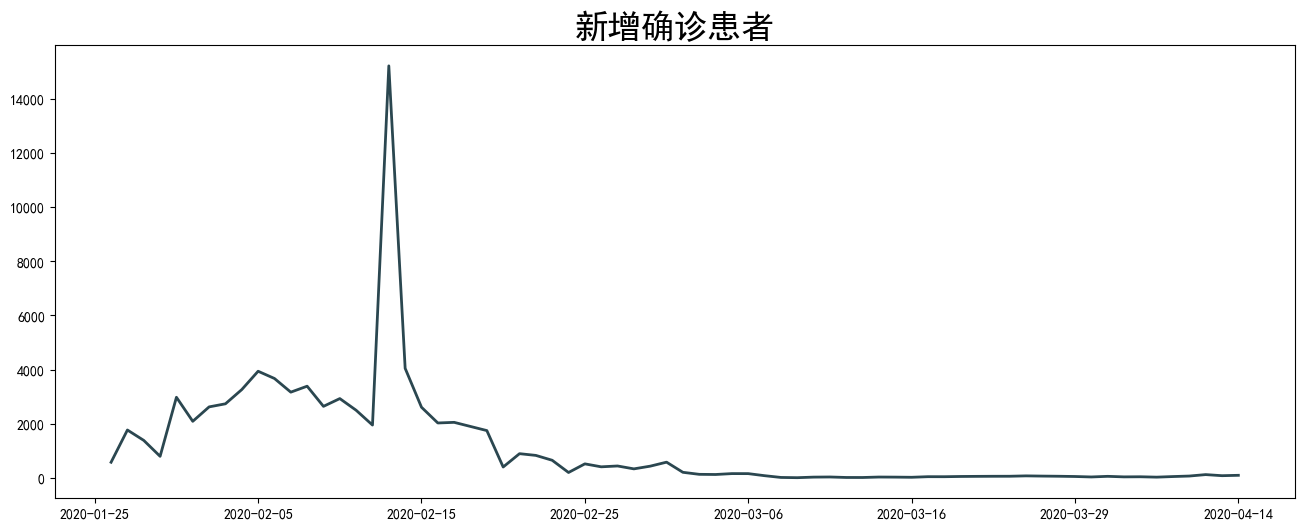

In [39]:
#新增确诊患者  date_confirmed
fig = plt.figure( figsize=(16,6), dpi=100)
ax = fig.add_subplot(1,1,1)
x = d.index
y = d.values
ax.set_title('新增确诊患者',fontdict={
      'color':'black',
      'size':24
})
ax.plot( x, y, color=dt_hex, linewidth=2, linestyle='-' )
ax.set_xticks( range(0,len(x),10))

分析：使用初始化数据构造date_new_cured的dataframe，然后作折线图表现时间趋势

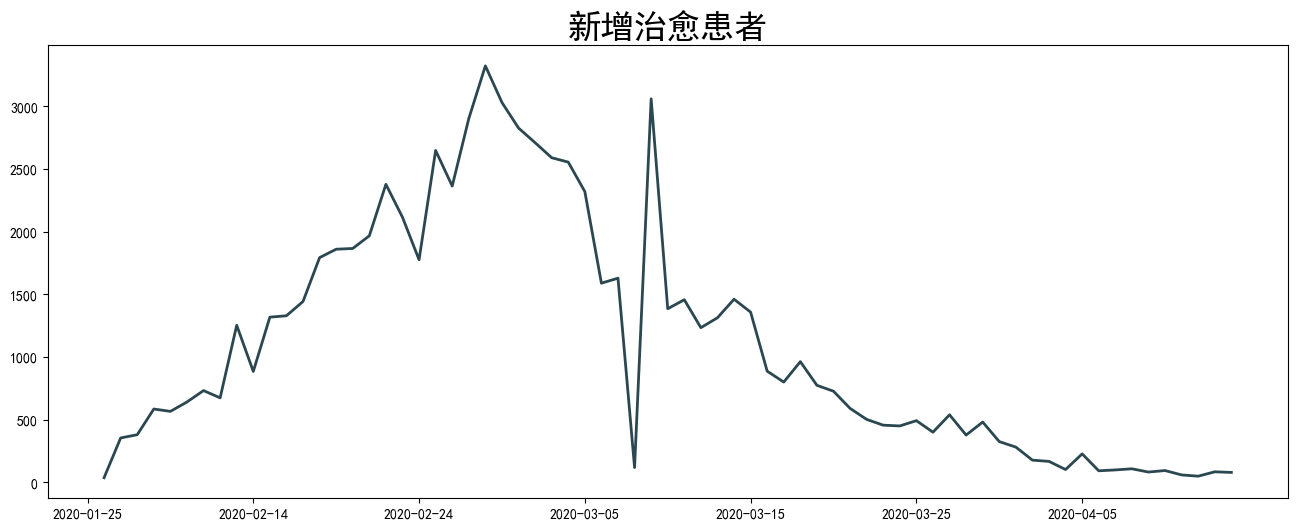

In [40]:
cu = data_new_frame(date_new_cured,china,'province_curedCount')
for i in range(len(cu)):
    dr = []
    for a,b in zip(range(0,len(cu)-1),range(1,len(cu)-2)):
        if cu.iloc[b].iloc[0] < cu.iloc[a].iloc[0]:
            dr.append(cu.iloc[b].iloc[0])
    cu = cu[~cu['China'].isin(dr)]
cu['China'] = cu['China'].diff()
cu.drop(['2020-06-20','2020-06-21'],inplace=True)
#新增治愈患者  date_new_cured
fig = plt.figure( figsize=(16,6), dpi=100)
ax = fig.add_subplot(1,1,1)
x = cu.index
y = cu.values
ax.set_title('新增治愈患者',fontdict={
      'color':'black',
      'size':24
})
ax.plot( x, y, color=dt_hex, linewidth=2, linestyle='-' )
ax.set_xticks( range(0,len(x),10))

分析：使用初始化数据构造date_new_dead的dataframe，然后作折线图表现时间趋势

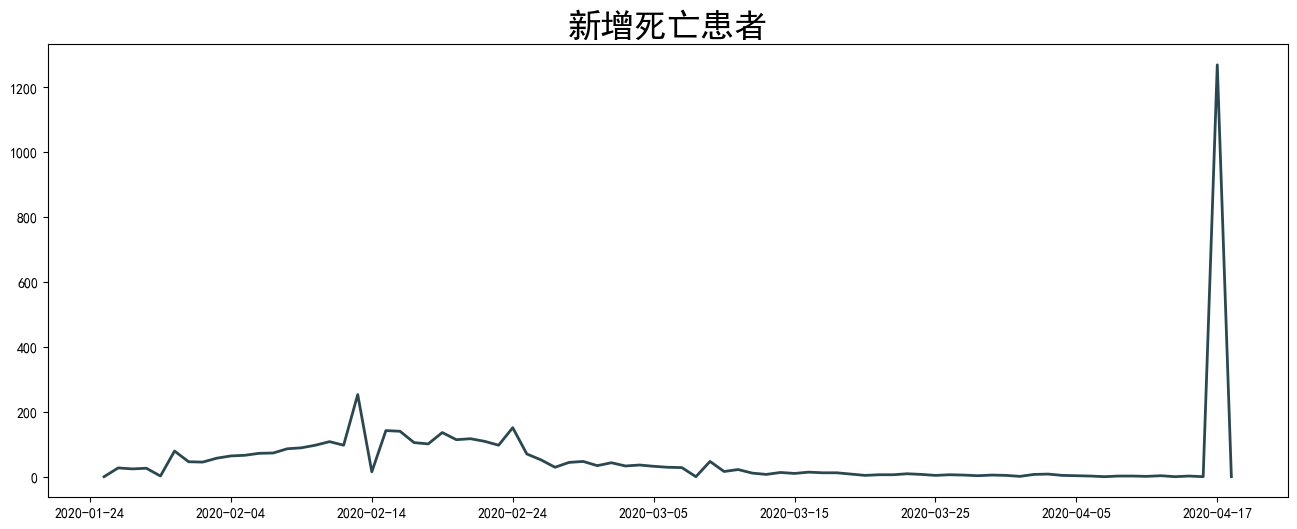

In [41]:
de = data_new_frame( date_new_dead,china,'province_deadCount')
for i in range(len(de)):
    dr = []
    for a,b in zip(range(0,len(de)-1),range(1,len(de)-2)):
        if de.iloc[b].iloc[0] < de.iloc[a].iloc[0]:
            dr.append(de.iloc[b].iloc[0])
    de = de[~de['China'].isin(dr)]
de['China'] = de['China'].diff()
de.drop(['2020-06-21'],inplace=True)
#新增死亡患者   date_new_dead
fig = plt.figure( figsize=(16,6), dpi=100)
ax = fig.add_subplot(1,1,1)
x = de.index
y = de.values
ax.set_title('新增死亡患者',fontdict={
      'color':'black',
      'size':24
})
ax.plot( x, y, color=dt_hex, linewidth=2, linestyle='-' )
ax.set_xticks( range(0,len(x),10))

分析：新增患者自1月末开始增加，到2月14日前后到达顶点，后增数下降，趋于平缓。    
分析：新增治愈患者自1月末开始增加，到3月02日前后达到顶峰，后增数下降，从4月初开始趋于平缓。    
分析：新增死亡患者自1月末开始增加，到2月达到高峰，自3月初开始增数平缓，到4月17日前后因为统计因素飙升后回落。  

#### （三）全国新增境外输入随时间变化趋势如何？

分析：新增境外输入数据需要对CHINA进行运算，逐日相减。

分析：先从CHINA取出境外输入的数据，然后补全时间序列并作差。

In [42]:
imported = CHINA.loc[CHINA['cityName'] == '境外输入']
imported.updateTime = pd.to_datetime(imported.updateTime,format="%Y-%m-%d",errors='coerce').dt.date
imported

D:\Anaconda\envs\python32\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,continentName,continentEnglishName,countryName,countryEnglishName,provinceName,provinceEnglishName,province_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,updateTime,cityName,cityEnglishName,city_zipCode,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount
136,亚洲,Asia,中国,China,陕西省,Shaanxi,610000,317,1.0,307,3,2020-06-23,境外输入,NaN,0.0,72.0,0.0,65.0,0.0
150,亚洲,Asia,中国,China,江苏省,Jiangsu,320000,654,3.0,653,0,2020-06-23,境外输入,NaN,0.0,23.0,0.0,22.0,0.0
201,亚洲,Asia,中国,China,北京市,Beijing,110000,843,164.0,584,9,2020-06-23,境外输入,NaN,0.0,174.0,3.0,173.0,0.0
214,亚洲,Asia,中国,China,河北省,Hebei,130000,346,0.0,323,6,2020-06-23,境外输入,NaN,0.0,10.0,0.0,10.0,0.0
218,亚洲,Asia,中国,China,天津市,Tianjin,120000,198,48.0,192,3,2020-06-23,境外输入,NaN,0.0,61.0,0.0,59.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115420,亚洲,Asia,中国,China,陕西省,Shaanxi,610000,250,1.0,240,3,2020-03-25,境外输入,NaN,0.0,5.0,1.0,0.0,0.0
115956,亚洲,Asia,中国,China,天津市,Tianjin,120000,145,0.0,133,3,2020-03-24,境外输入,NaN,0.0,9.0,0.0,0.0,0.0
116164,亚洲,Asia,中国,China,甘肃省,Gansu,620000,136,0.0,119,2,2020-03-24,境外输入,NaN,0.0,45.0,0.0,30.0,0.0
117171,亚洲,Asia,中国,China,上海市,Shanghai,310000,414,0.0,330,4,2020-03-24,境外输入,NaN,0.0,75.0,0.0,3.0,0.0


分析：补全省份缺失时间的数据

In [43]:
for i in range(0,len(province)):
    list_j_d = []
    date_b = []
    for dt in imported.loc[imported['provinceName'] ==  province[i]]['updateTime']:
        date_b.append(str(dt))
    list_j_d = list(set(date_b))
    list_j_d.sort()
    #imported.loc[imported['provinceName'] == province[3]]
    try:
        start = imported.loc[imported['provinceName'] ==  province[i]]['updateTime'].min()
        end = imported.loc[imported['provinceName'] ==  province[i]]['updateTime'].max()
        dates_b = pd.date_range(start=str(start), end=str(end))
        aid_frame_b = pd.DataFrame({'updateTime': dates_b,'provinceName':[province[i]]*len(dates_b)})
        aid_frame_b.updateTime = pd.to_datetime(aid_frame_b.updateTime,format="%Y-%m-%d",errors='coerce').dt.date
        #draft = pd.merge(china.loc[china['provinceName'] ==  province[1]], aid_frame, on='updateTime', how='outer').sort_values('updateTime')
        draft_b = pd.concat([imported.loc[imported['provinceName'] ==  province[i]], aid_frame_b], join='outer').sort_values('updateTime')
        draft_b.city_confirmedCount.fillna(method="ffill",inplace=True)
        draft_b.city_suspectedCount.fillna(method="ffill", inplace=True)
        draft_b.city_curedCount.fillna(method="ffill", inplace=True)
        draft_b.city_deadCount.fillna(method="ffill", inplace=True)
        draft_b.loc[draft_b['provinceName'] ==  province[i]].fillna(0,inplace=True,limit = 1)
        draft_b.loc[draft_b['provinceName'] ==  province[i]].loc[:,'city_confirmedCount':'city_deadCount'] = draft_b.loc[draft_b['provinceName'] ==  province[i]].loc[:,'city_confirmedCount':'city_deadCount'].diff()
        draft_b.dropna(subset=['city_confirmedCount','city_suspectedCount','city_curedCount','city_deadCount'],inplace=True)
        imported = pd.concat([imported,draft_b], join='outer').sort_values('updateTime')
    except:
        continue
imported

,continentName,continentEnglishName,countryName,countryEnglishName,provinceName,provinceEnglishName,province_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,updateTime,cityName,cityEnglishName,city_zipCode,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount
115956,亚洲,Asia,中国,China,天津市,Tianjin,120000.0,145.0,0.0,133.0,3.0,2020-03-24,境外输入,NaN,0.0,9.0,0.0,0.0,0.0
0,NaN,NaN,NaN,NaN,甘肃省,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-24,NaN,NaN,NaN,45.0,0.0,30.0,0.0
117597,亚洲,Asia,中国,China,天津市,Tianjin,120000.0,142.0,0.0,133.0,3.0,2020-03-24,境外输入,NaN,0.0,6.0,0.0,0.0,0.0
117597,亚洲,Asia,中国,China,天津市,Tianjin,120000.0,142.0,0.0,133.0,3.0,2020-03-24,境外输入,NaN,0.0,6.0,0.0,0.0,0.0
116164,亚洲,Asia,中国,China,甘肃省,Gansu,620000.0,136.0,0.0,119.0,2.0,2020-03-24,境外输入,NaN,0.0,45.0,0.0,30.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,亚洲,Asia,中国,China,江苏省,Jiangsu,320000.0,654.0,3.0,653.0,0.0,2020-06-23,境外输入,NaN,0.0,23.0,0.0,22.0,0.0
136,亚洲,Asia,中国,China,陕西省,Shaanxi,610000.0,317.0,1.0,307.0,3.0,2020-06-23,境外输入,NaN,0.0,72.0,0.0,65.0,0.0
91,NaN,NaN,NaN,NaN,天津市,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-23,NaN,NaN,NaN,61.0,0.0,59.0,0.0
136,亚洲,Asia,中国,China,陕西省,Shaanxi,610000.0,317.0,1.0,307.0,3.0,2020-06-23,境外输入,NaN,0.0,72.0,0.0,65.0,0.0


分析：作copy()防止数据处理失误使得原数据丢失

In [44]:
draft_i = imported.copy()

分析：初始化一个省份数据，保证这个方法可行

In [45]:
real_s = imported.loc[imported['provinceName'] == province[0]]
real_s.drop_duplicates(subset='updateTime', keep='first', inplace=True)
draft_i =  real_s
for p in province:
    real_data = imported.loc[imported['provinceName'] == p]
    real_data.drop_duplicates(subset='updateTime', keep='first', inplace=True)
    #imported = pd.concat([real_data, china],sort=False)
    draft_i = pd.concat([real_data,draft_i],sort=False)

D:\Anaconda\envs\python32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\python32\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


分析：确认方法无误，对余下省份进行相同的处理

In [46]:
imported = draft_i

In [47]:
imported = imported.set_index('provinceName')
imported = imported.reset_index()

分析：进行各个省份的数据合并。

In [48]:
list_p = []
list_d = []
list_e = []
for p in range(0,32):
    try:
        con_0 = imported.loc[imported['updateTime'] == date[2]].loc[imported['provinceName'] ==  province[p]].iloc[[0]].iloc[0] 
        list_p.append(con_0['city_confirmedCount'])#该日每省的累计确诊人数
    except:
        continue
list_d.append(sum(list_p))
list_e.append(str(date[0]))
date_new_foreign_confirmed = pd.DataFrame(list_d,index=list_e)
date_new_foreign_confirmed.index.name="date"
date_new_foreign_confirmed.columns=["imported_confirmedCount"]
date_new_foreign_confirmed

,imported_confirmedCount
date,
2020-01-24,0


In [49]:
l = 0
for i in date[3:]:
    list_p = []
    list_d = []
    list_e = []
    l +=1
    for p in range(0,32):
        try:
            con_0 = imported.loc[imported['updateTime'] == date[l]].loc[imported['provinceName'] ==  province[p]].iloc[[0]].iloc[0] 
            list_p.append(con_0['city_confirmedCount'])#该日每省的累计确诊人数
        except:
            continue
    #con_0 = imported.loc[imported['updateTime'] == date[0]].loc[imported['provinceName'] == '河北省'].loc[[0]].iloc[0]
    #list_p.append(con_0['city_confirmedCount'])#该日每省的累计确诊人数
    list_d.append(sum(list_p))
    list_e.append(str(date[l]))
    confirmed = pd.DataFrame(list_d, index=list_e)
    confirmed.index.name="date"
    confirmed.columns=["imported_confirmedCount"]
    date_new_foreign_confirmed = pd.concat([date_new_foreign_confirmed,confirmed],sort=False)
date_new_foreign_confirmed

,imported_confirmedCount
date,
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
2020-01-27,0.0
2020-01-28,0.0
...,...
2020-06-17,848.0
2020-06-18,800.0
2020-06-19,800.0


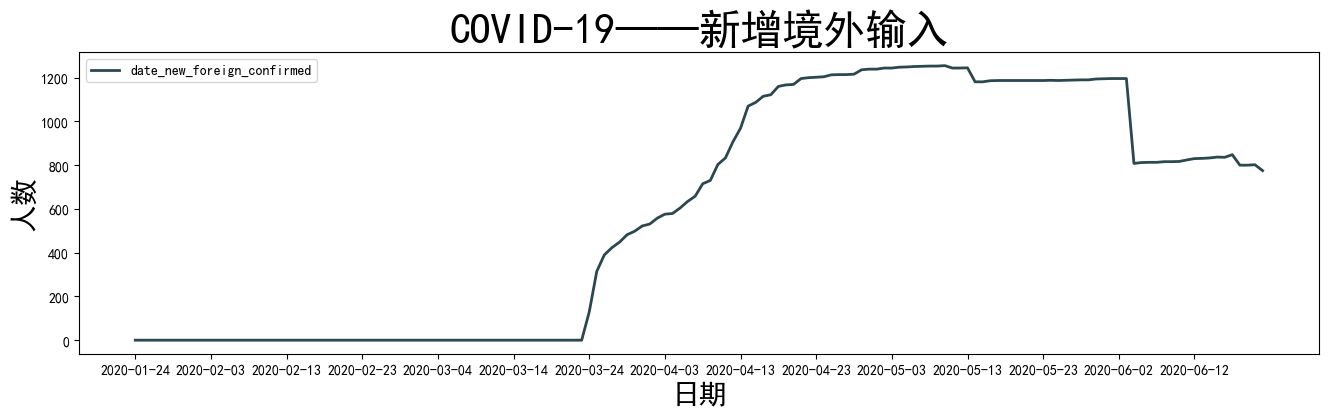

In [50]:
#新增境外输入
fig = plt.figure( figsize=(16,4), dpi=100)
ax = fig.add_subplot(1,1,1)
x = date_new_foreign_confirmed.index
y = date_new_foreign_confirmed.values
plot = ax.plot( x, y, color=dt_hex, linewidth=2, linestyle='-',label='date_new_foreign_confirmed' )
ax.set_xticks( range(0,len(x),10))
plt.xlabel('日期',fontsize=20)
plt.ylabel('人数',fontsize=20)
plt.title('COVID-19——新增境外输入',fontsize=30)
ax.legend( loc=0, frameon=True )

分析总结：境外输入病例自3月末开始激增，到5月初增速趋于平缓，到6月初开始增速减缓。

#### （四）你所在的省市情况如何？

分析：首先取出广东省的所有时间序列,转换成string类型,然后进行排序

In [51]:
m_dates = list(set(myhome['updateTime']))
aid_d = m_dates.copy()
for d in aid_d:
    a = str(d)
    m_dates.remove(d)
    m_dates.append(a)
m_dates.sort()

In [52]:
myhome = myhome.set_index('provinceName')
myhome = myhome.reset_index()

分析：遍历我的城市对应的省份的时间构建对应的dataframe

In [53]:
#广东省累计确诊人数
list_g = []
for i in range(0,len(m_dates)):
    try:
        con_m = myhome.loc[myhome['updateTime'] == date[i]].loc[myhome['cityName'] == '茂名'].iloc[[0]].iloc[0] 
        list_g.append(con_m['province_confirmedCount'])
    except:
        list_g.append(0)
        continue
g_date_confirmed = pd.DataFrame(list_g, index=m_dates)
g_date_confirmed.index.name="date"
g_date_confirmed.columns=["g_confirmed"]
g_date_confirmed=g_date_confirmed[~g_date_confirmed['g_confirmed'].isin([0])]


#广东省累计治愈人数
list_g = []
for i in range(0,len(m_dates)):
    try:
        con_m = myhome.loc[myhome['updateTime'] == date[i]].loc[myhome['cityName'] == '茂名'].iloc[[0]].iloc[0] 
        list_g.append(con_m['province_curedCount'])
    except:
        list_g.append(0)
        continue
g_date_cured = pd.DataFrame(list_g, index=m_dates)
g_date_cured.index.name="date"
g_date_cured.columns=["g_cured"]
g_date_cured=g_date_cured[~g_date_cured['g_cured'].isin([0])]


#广东省累计死亡人数
list_g = []
for i in range(0,len(m_dates)):
    try:
        con_m = myhome.loc[myhome['updateTime'] == date[i]].loc[myhome['cityName'] == '茂名'].iloc[[0]].iloc[0] 
        list_g.append(con_m['province_deadCount'])
    except:
        list_g.append(0)
        continue
g_date_dead = pd.DataFrame(list_g, index=m_dates)
g_date_dead.index.name="date"
g_date_dead.columns=["g_dead"]
g_date_dead=g_date_dead[~g_date_dead['g_dead'].isin([0])]

分析：作折线图表现疫情随时间变化趋势

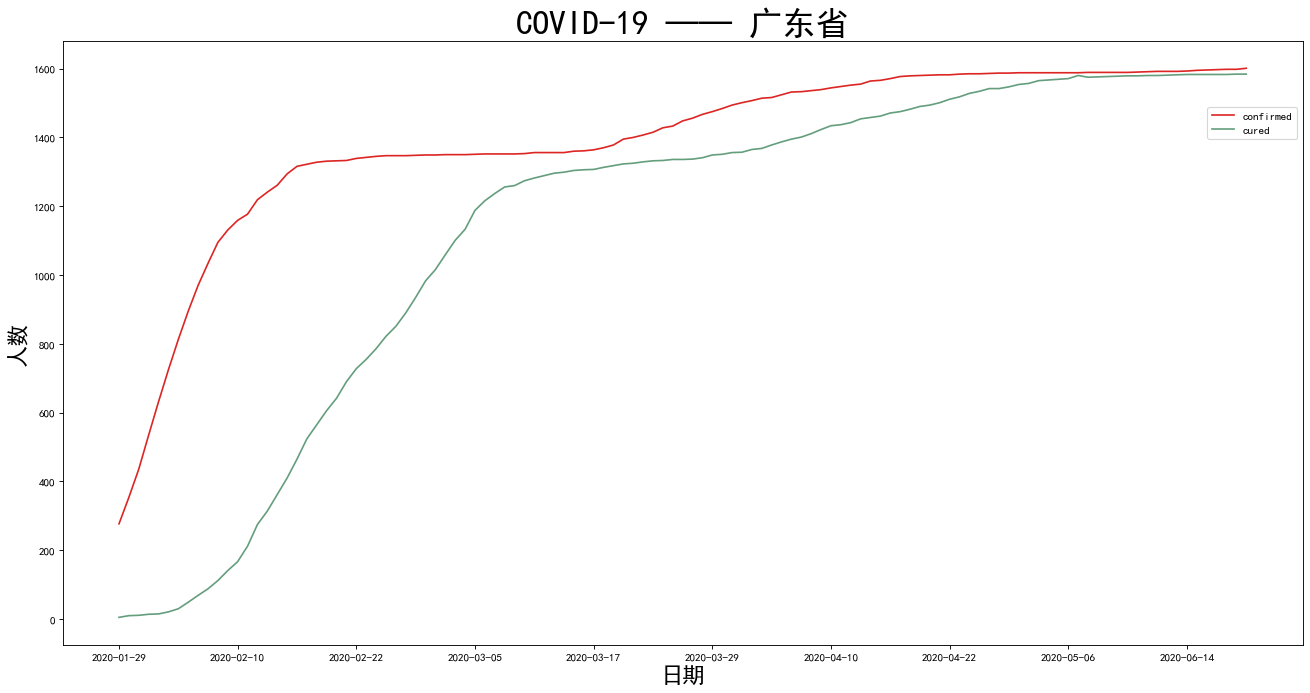

In [54]:
##广东省累计确诊人数  广东省累计治愈人数
plt.rcParams['font.sans-serif'] = ['SimHei'] 
x= g_date_confirmed.index
y1 = g_date_confirmed.values
y2 = g_date_cured.values
y3 = g_date_dead
#font_manager = font_manager.FontProperties(fname = 'C:/Windows/Fonts/simsun.ttc',size = 18)
plt.figure(figsize=(20,10),dpi = 80)
plt.plot(x,y1,color = r_hex,label = 'confirmed')
plt.plot(x,y2,color = g_hex,label = 'cured')
x_major_locator=MultipleLocator(12)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.title('COVID-19 —— 广东省',fontsize=30)
plt.xlabel('日期',fontsize=20)
plt.ylabel('人数',fontsize=20)
plt.legend(loc=1, bbox_to_anchor=(1.00,0.90), bbox_transform=ax.transAxes)

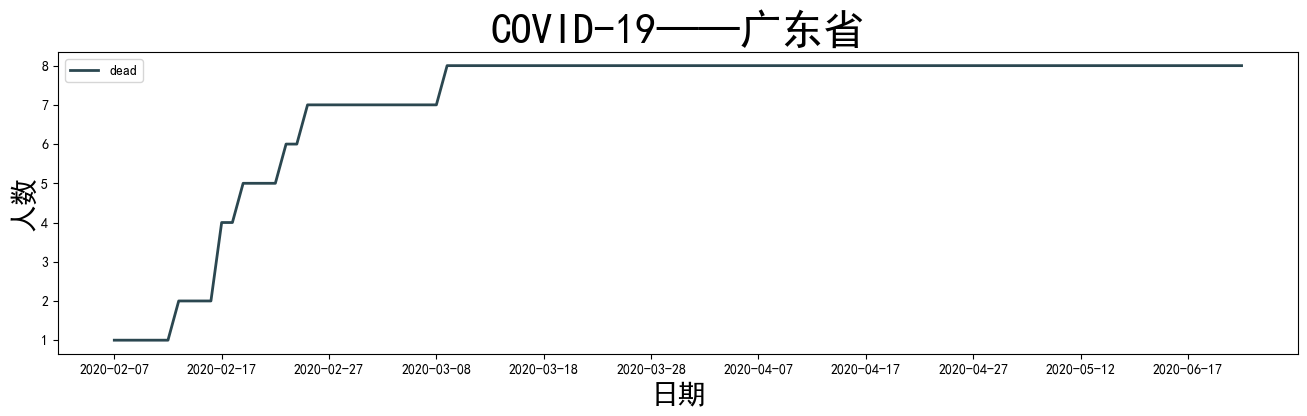

In [55]:
#广东省累计死亡人数
plt.rcParams['font.sans-serif'] = ['SimHei'] 
fig = plt.figure( figsize=(16,4), dpi=100)
ax = fig.add_subplot(1,1,1)
x = g_date_dead.index
y = g_date_dead.values
plot = ax.plot( x, y, color=dt_hex, linewidth=2, linestyle='-',label='dead' )
ax.set_xticks( range(0,len(x),10))
plt.xlabel('日期',fontsize=20)
plt.ylabel('人数',fontsize=20)
plt.title('COVID-19——广东省',fontsize=30)
ax.legend( loc=0, frameon=True )

分析：广东省的数据补全很成功，真实性高。    
分析：从折线图来看，广东省自1月末起感染人数激增，直到2月中旬趋于平缓，3月初开始由于检测普及以及统计因素，短期确诊患者人数小幅度增加。广东省自2月初开始治愈人数激增，直到6月初开始因为新增感染人数趋于平缓，所以治愈人数趋于平缓。广东省自3月初开始不再有新增死亡患者。

#### （五）国外疫情态势如何？

分析：数据去除空值

In [56]:
world.dropna(axis=1, how='any', inplace=True)
#world.set_index('updateTime')

D:\Anaconda\envs\python32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


分析：创建国家列表country，创建日期列表date_y

In [57]:
country = list(set(world['provinceName']))
date_y = []
for dt in world.loc[world['provinceName'] ==  country[0]]['updateTime']:
    date_y.append(str(dt))
date_y = list(set(date_0))
date_y.sort()

分析：遍历国家列表对world中的updateTime进行处理并去重。

In [58]:
for c in country:
    world.loc[world['provinceName'] == c].sort_values(by = 'updateTime')
world.dropna(subset=['provinceName'],inplace=True)
world.updateTime = pd.to_datetime(world.updateTime,format="%Y-%m-%d",errors='coerce').dt.date

D:\Anaconda\envs\python32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\envs\python32\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


分析：取前15个国家的province_confirmedCount透视构成world_confirmed，并进行数据补全处理

In [59]:
world_confirmed = world.loc[world['provinceName'] == world.head(15)['provinceName'][0]].pivot_table(index='updateTime', columns='provinceName', values='province_confirmedCount',aggfunc=np.mean)
for i in world.head(15)['provinceName'][1:]:
    draft_c = world.loc[world['provinceName'] == i].pivot_table(index='updateTime', columns='provinceName', values='province_confirmedCount',aggfunc=np.mean)
    world_confirmed = pd.merge(world_confirmed,draft_c,on='updateTime', how='outer',sort=True)
world_confirmed.fillna(0,inplace=True,limit = 1)
world_confirmed.fillna(method="ffill",inplace=True)
world_confirmed

provinceName,美国,巴西,英国,俄罗斯,智利,印度,巴基斯坦,秘鲁,西班牙,孟加拉国,法国,沙特阿拉伯,瑞典,南非,厄瓜多尔
updateTime,,,,,,,,,,,,,,,
2020-01-27,5.000000e+00,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00,0.00,3.000000,0.000000,0.000000,0.0,0.000000
2020-01-29,0.000000e+00,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00,0.00,4.000000,0.000000,0.000000,0.0,0.000000
2020-01-30,0.000000e+00,0.00,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.00,0.00,5.000000,0.000000,0.000000,0.0,0.000000
2020-01-31,6.000000e+00,0.00,2.000000,2.0,0.0,1.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.0,0.000000
2020-02-01,6.000000e+00,0.00,2.000000,2.0,0.0,1.000000,0.000000,0.000000,4.00,0.00,5.500000,0.000000,1.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-19,2.184912e+06,976906.50,300469.000000,563084.0,225103.0,371474.666667,162935.600000,243518.000000,245268.00,102292.00,158641.000000,145991.000000,55672.750000,83020.5,48256.400000
2020-06-20,2.221982e+06,1038568.00,302138.750000,573007.5,231393.0,390209.333333,169464.666667,247925.000000,245665.75,105535.00,159452.000000,151277.250000,56201.500000,87715.0,49519.666667
2020-06-21,2.253118e+06,1068977.25,303284.428571,579160.0,236748.0,399451.714286,174346.222222,251338.000000,245938.00,109657.75,160093.000000,154715.714286,56360.000000,92681.0,49731.000000


分析：作前15个国家的疫情随时间变动表

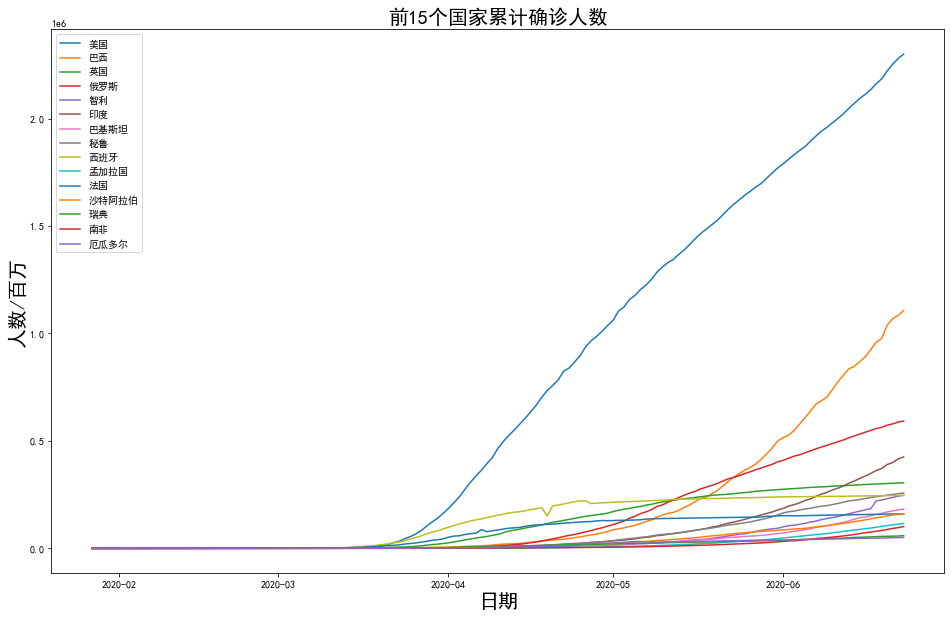

In [60]:
#plt.rcParams['font.sans-serif'] = ['SimHei']  
fig = plt.figure(figsize=(16,10))
plt.plot(world_confirmed)
plt.legend(world_confirmed.columns)
plt.title('前15个国家累计确诊人数',fontsize=20)
plt.xlabel('日期',fontsize=20)
plt.ylabel('人数/百万',fontsize=20);

分析：国外数据的补全较为成功，有一定的真实性。   
分析：国外新冠确诊人数自3月末开始激增，排名前四的国家的疫情没有受到控制的趋势，国外疫情的趋势为确诊人数继续激增。

#### （六）结合你的分析结果，对个人和社会在抗击疫情方面有何建议？

 从国内疫情折线图来看，从4月末开始疫情趋于平缓，相反，国外疫情从4月初开始爆发，至今没有看到平缓的趋势。       
 从境外输入案例来看，我们需要谨防境外输入病例，遏制国内新冠再次传播，一切都不能放松警惕。    
 对于个人，我们要避免到人员密集的区域，外出一定要戴好口罩，回家要做全面的消毒。   
 对于社会，在交通发达区域和人员密集区域，需要普及病毒检测和场所消毒措施，切断病毒的传播途径，维护我国疫情防控的成果。   

### 附加分析(选做，但做的出彩会加分哦)

附加分析，所使用的库不限，比如可以使用seaborn、pyecharts等库。

童鞋们，自由发挥吧！！